# Séries Temporais


In [ ]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
!pip install pmdarima

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/timeline.csv")
dados.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [ ]:
dados['month'] = pd.to_datetime(dados['month'])
dados.set_index('month',inplace = True)

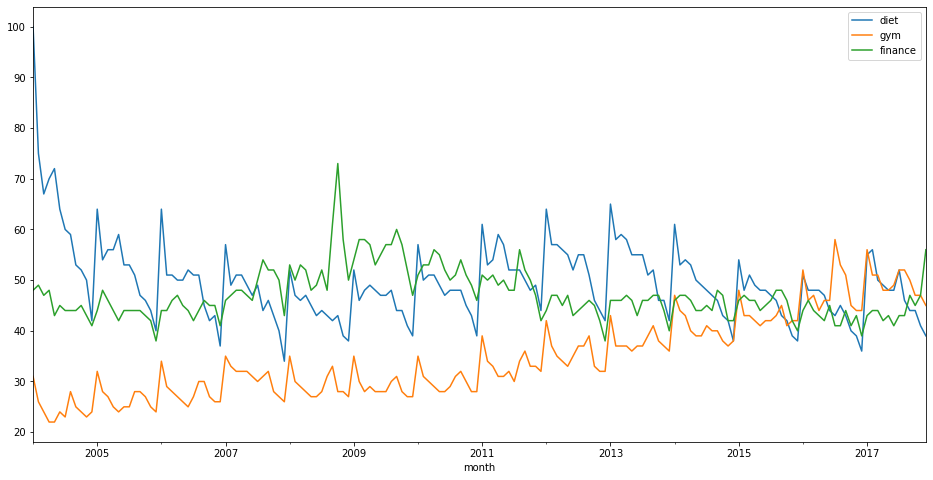

In [ ]:
dados.plot(figsize = (16,8))

#Previsão para Finance

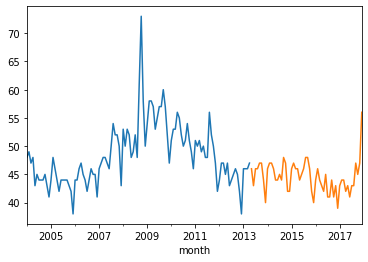

In [ ]:
#Separando em treino e teste
treino = dados.finance[:int(len(dados.finance)*2/3)]
teste = dados.finance[int(len(dados.finance)*2/3):]

treino.plot()
teste.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 576x432 with 0 Axes>

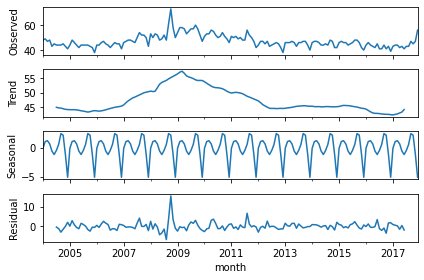

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(dados.finance)

fig = plt.figure(figsize = (8,6))
fig = resultado.plot()

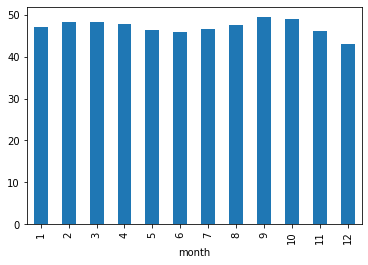

In [ ]:
dados.finance.groupby(dados.finance.index.month).mean().plot(kind = 'bar')

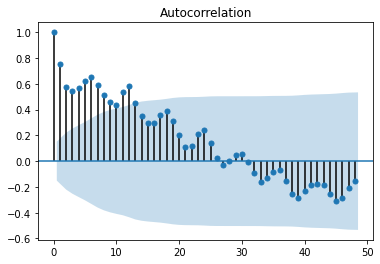

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dados.finance,lags = 48)
plt.show()

In [ ]:
from pmdarima import auto_arima
fit_arima = auto_arima(dados.finance,d = 1,start_p = 1,
                       seasonal = True,
                       m = 6,
                       D = 1,
                       trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[6]             : AIC=814.903, Time=0.64 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=928.902, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=852.772, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=821.065, Time=0.24 sec
 ARIMA(1,1,2)(0,1,1)[6]             : AIC=813.313, Time=0.49 sec
 ARIMA(1,1,2)(0,1,0)[6]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,2)(0,1,2)[6]             : AIC=815.067, Time=0.85 sec
 ARIMA(1,1,2)(1,1,0)[6]             : AIC=833.249, Time=0.33 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=811.656, Time=1.78 sec
 ARIMA(1,1,2)(2,1,2)[6]             : AIC=813.187, Time=3.90 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=inf, Time=2.01 sec
 ARIMA(0,1,2)(1,1,2)[6]             : AIC=810.132, Time=1.90 sec
 ARIMA(0,1,2)(0,1,2)[6]             : AIC=814.117, Time=0.39 sec
 ARIMA(0,1,2)(1,1,1)[6]             : AIC=813.999, Time=0.22 sec
 ARIMA(0,1,2)(2,1,2)[6]             : AIC=inf, Time=0.7

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(dados.finance,freq = "MS",order = (0,1,2), seasonal_order = (1,1,2,6)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
(sarima.resid**2).mean()

25.468967377255055

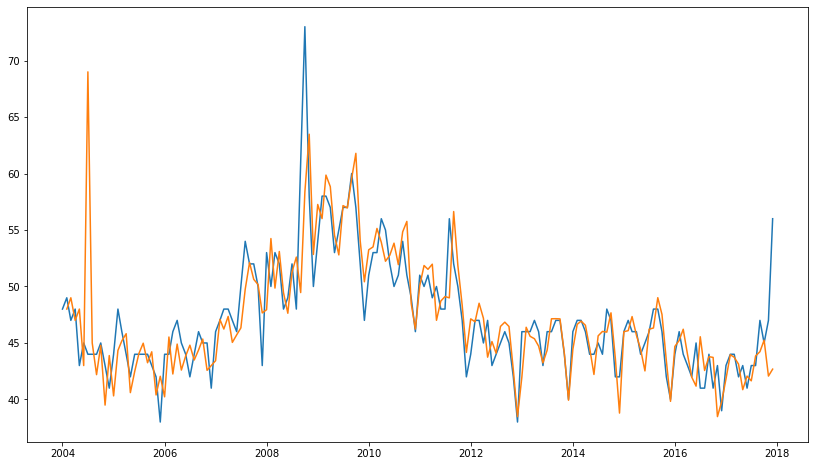

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(dados.finance)
plt.plot(sarima.predict(typ = 'levels')[1:])

In [ ]:
#Fazer predição
forecast = sarima.get_forecast(steps = 36)

forecast_media = forecast.predicted_mean
abaixo = forecast.conf_int().iloc[:,0]
acima = forecast.conf_int().iloc[:,1]

datas_forecast = np.asarray(forecast_media.index)

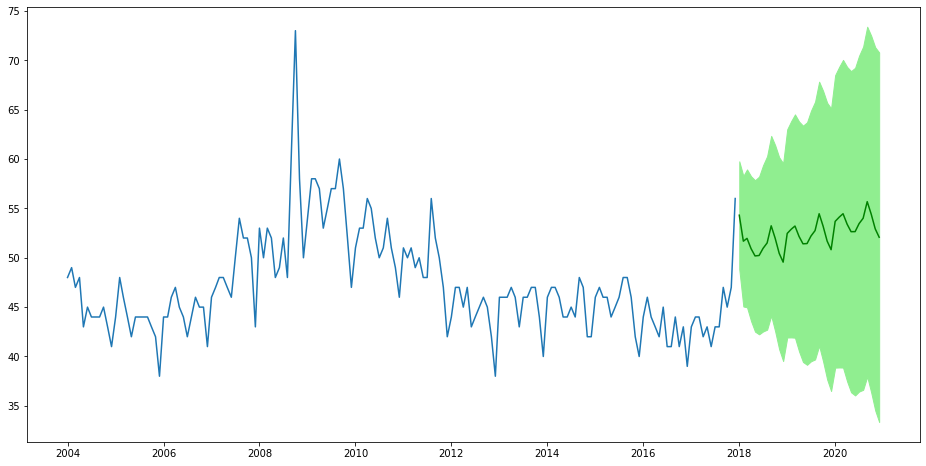

In [ ]:
plt.figure(figsize = (16,8))

plt.plot(datas_forecast, forecast_media.values, color = 'green',label = 'forecast')
plt.fill_between(datas_forecast,abaixo,acima, color = 'lightgreen')
plt.plot(dados.finance)

#Previsão com Diet

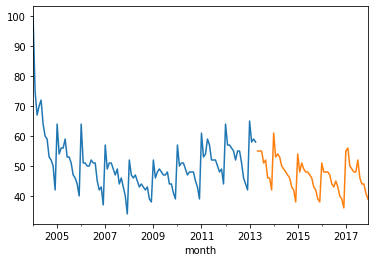

In [ ]:
#Separando em treino e teste
treino = dados.diet[:int(len(dados.diet)*2/3)]
teste = dados.diet[int(len(dados.diet)*2/3):]

treino.plot()
teste.plot()

<Figure size 576x432 with 0 Axes>

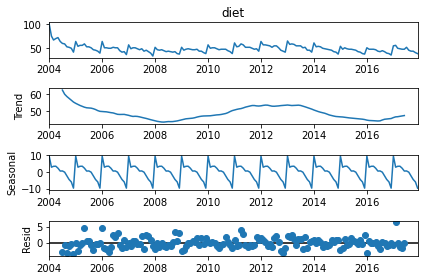

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(dados.diet)

fig = plt.figure(figsize = (8,6))
fig = resultado.plot()

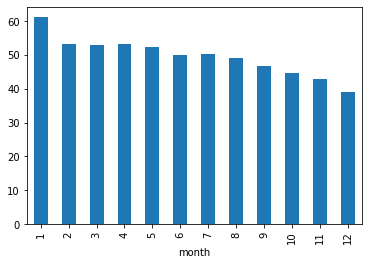

In [ ]:
dados.diet.groupby(dados.diet.index.month).mean().plot(kind = 'bar')

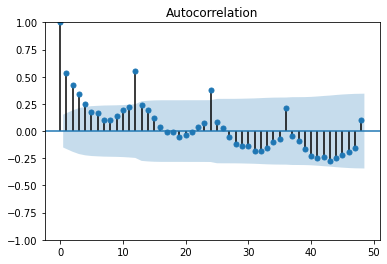

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dados.diet,lags = 48)
plt.show()

In [ ]:
from pmdarima import auto_arima
fit_arima = auto_arima(treino,d = 1,start_p = 1,
                       seasonal = True,
                       m = 12,
                       D = 1,
                       trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=511.391, Time=1.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=514.442, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=506.818, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=506.804, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=515.735, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=508.186, Time=0.67 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=508.056, Time=1.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=506.512, Time=0.32 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=508.111, Time=0.75 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=510.064, Time=1.54 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=506.013, Time=0.14 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=507.198, Time=0.31 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=507.251, Time=0.36 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=505.412, Time=0.23 sec
 ARIMA(0,1,0)(0,1,2)[12]         

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(treino,freq = "MS",order = (0,1,0), seasonal_order = (0,1,1,12)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
(sarima.resid**2).mean()

112.757294260153

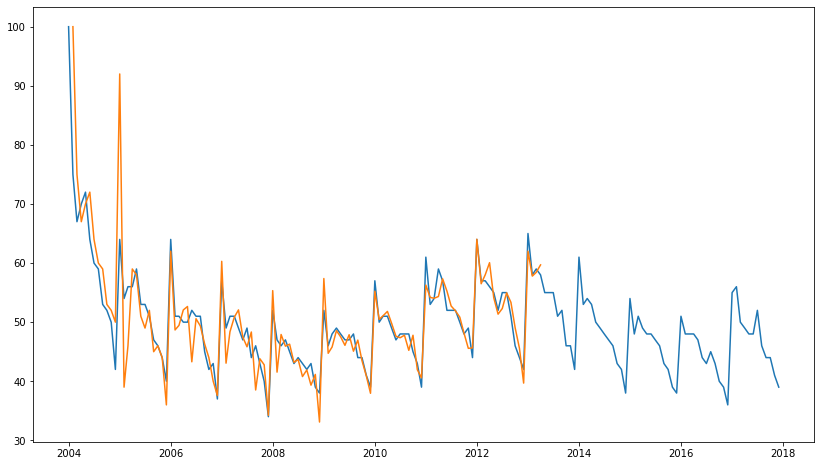

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(dados.diet)
plt.plot(sarima.predict(typ = 'levels')[1:])

In [ ]:
#Fazer predição
forecast = sarima.get_forecast(steps = 56)

forecast_media = forecast.predicted_mean
abaixo = forecast.conf_int().iloc[:,0]
acima = forecast.conf_int().iloc[:,1]

datas_forecast = np.asarray(forecast_media.index)

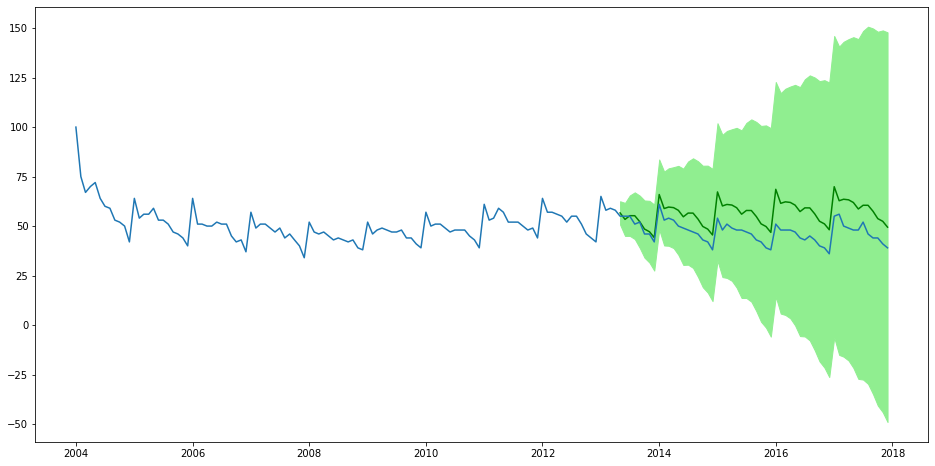

In [ ]:
plt.figure(figsize = (16,8))

plt.plot(datas_forecast, forecast_media.values, color = 'green',label = 'forecast')
plt.fill_between(datas_forecast,abaixo,acima, color = 'lightgreen')
plt.plot(dados.diet)

#Previsão COVID-19

In [ ]:
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting data
import seaborn as sns

mundo = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
mundo.date = pd.to_datetime(mundo.date,format = '%Y.%m.%d')
mundo['year'] = pd.DatetimeIndex(mundo['date']).year


mundo.set_index('date',inplace = True)
mundo.head()


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020


In [ ]:
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting data
import seaborn as sns

mundo = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
mundo.date = pd.to_datetime(mundo.date,format = '%Y.%m.%d')
mundo['year'] = pd.DatetimeIndex(mundo['date']).year

brasil = mundo.loc[(mundo['location']) == 'Brazil']
brasil.set_index('date',inplace = True)
brasil.tail()


KeyboardInterrupt: ignored

In [ ]:
brasil = brasil[['new_cases','new_deaths']]
brasil.dropna(inplace = True)

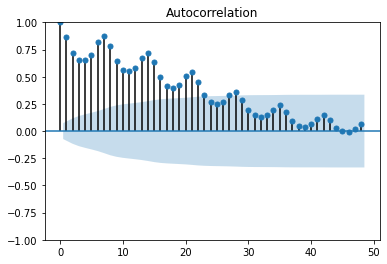

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(brasil.new_cases,lags = 48)
plt.show()

In [ ]:
from pmdarima import auto_arima
fit_arima = auto_arima(brasil.new_cases,d = 1,start_p = 1,
                       seasonal = True,
                       m = 7,
                       D = 1,
                       trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[7]             : AIC=15230.253, Time=3.30 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=15577.075, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=15388.791, Time=0.45 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=15271.776, Time=0.59 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=15241.277, Time=1.51 sec
 ARIMA(1,1,2)(1,1,0)[7]             : AIC=15285.485, Time=1.24 sec
 ARIMA(1,1,2)(2,1,1)[7]             : AIC=15230.377, Time=5.63 sec
 ARIMA(1,1,2)(1,1,2)[7]             : AIC=15229.959, Time=5.86 sec
 ARIMA(1,1,2)(0,1,2)[7]             : AIC=15233.045, Time=2.37 sec
 ARIMA(1,1,2)(2,1,2)[7]             : AIC=15233.738, Time=4.40 sec
 ARIMA(0,1,2)(1,1,2)[7]             : AIC=15228.936, Time=3.77 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=15231.975, Time=1.11 sec
 ARIMA(0,1,2)(1,1,1)[7]             : AIC=15229.295, Time=0.84 sec
 ARIMA(0,1,2)(2,1,2)[7]             : AIC=15232.830, Time=3.78 sec
 ARIMA(0,1,2)(0,1,1

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(brasil.new_cases,order = (0,1,2), seasonal_order = (1,1,2,7)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
(sarima.resid**2).mean()

150110517.40410545

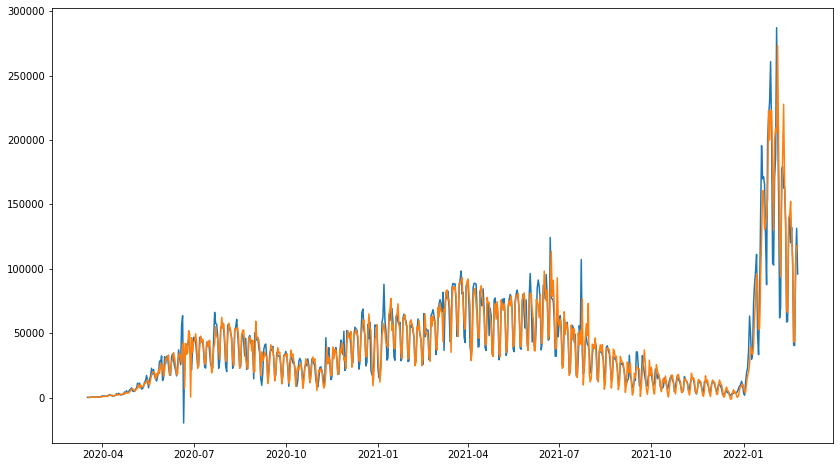

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(brasil.new_cases)
plt.plot(sarima.predict(typ = 'levels')[1:])

In [ ]:
#Fazer predição
forecast = sarima.get_forecast(steps = 14)

forecast_media = forecast.predicted_mean
abaixo = forecast.conf_int().iloc[:,0]
acima = forecast.conf_int().iloc[:,1]

datas_forecast = pd.date_range('2022-02-25',freq = "D", periods = 14)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


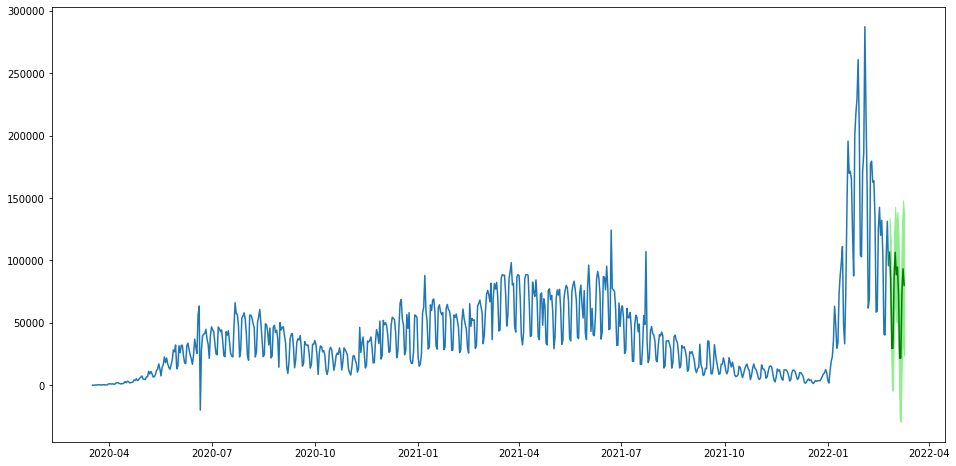

In [ ]:
plt.figure(figsize = (16,8))

plt.plot(datas_forecast, forecast_media.values, color = 'green',label = 'forecast')
plt.fill_between(datas_forecast,abaixo,acima, color = 'lightgreen')
plt.plot(brasil.new_cases)

In [ ]:
forecast_media

709    106526.134579
710     85296.474234
711     29557.607279
712     29629.722076
713     86280.062919
714    106501.770588
715     88500.882554
716     94767.412617
717     72413.607819
718     21624.280354
719     21716.121034
720     74700.573852
721     93272.610100
722     80042.501739
Name: predicted_mean, dtype: float64